##### **Import libraries**
We first import the necessary libraries needed for analysis:
-  `numpy`:  for array munipulation
-  `pandas`: for arranging data in a dataframe format, with rows and columns munipulation
-  `pyplot` from `matplotlib`: for data visualization
-   `sklearn` : for ML model implementation, data processing and inference 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

#### **Import dataset**
This stage consist of importing the dataset and visualizing it. It gives an overview of what the data  looks like

In [2]:
# import dataset
file_path = ('B:\_GITHUB\Machine-Learning-project-series\logistic regression\heart disease prediction\dataset\heart_disease.csv')
data = pd.read_csv(file_path)
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


#### **data Info**
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol**: The person's cholesterol measurement in mg/dl
- **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**: The person's maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca**: The number of major vessels (0-3)
- **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target**: Heart disease (0 = no, 1 = yes)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [56]:
# Changing data to default
# renaming the sex to male and female
#data.loc[data['sex'] == 1, 'sex'] = 'male'
#data['sex'].mask(data['sex'] == 1, 'male', inplace=True)
data['sex'] = np.where(data['sex'] == 1, 'male','female')

# changing chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
data.loc[data['cp'] == 1, 'cp'] = 'typical angina'
data.loc[data['cp'] == 2, 'cp'] = 'atypical angina'
data.loc[data['cp'] == 3, 'cp'] = 'non-anginal pain'
data.loc[data['cp'] == 4, 'cp'] = 'asymptomtic'
data.loc[data['cp'] == 0, 'cp'] = 'symptomtic'

# The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
data['fbs'] = np.where(data['fbs'] == 1, 'true', 'false')

# exang: Exercise induced angina (1 = yes; 0 = no)
data['exang'] = np.where(data['exang'] == 1, 'true', 'false')

# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
data.loc[data['slope'] == 0, 'slope'] = 'nosloping'
data.loc[data['slope'] == 1, 'slope'] = 'upsloping'
data.loc[data['slope'] == 2, 'slope'] = 'flat'
data.loc[data['slope'] == 3, 'slope'] = 'downsloping'

# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
data.loc[data['thal'] == 3, 'thal'] = 'normal'
data.loc[data['thal'] == 6, 'thal'] = 'fixed defect'
data.loc[data['thal'] == 7, 'thal'] = 'reversable defect'
data.loc[data['thal'] == 2, 'thal'] = 'defect'
data.loc[data['thal'] == 1, 'thal'] = 'abnormal'

# target: Heart disease (0 = no, 1 = yes)
data['target'] = np.where(data['target'] == 1, 'cancer', 'no cancer')

data.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,symptomtic,125,212,false,1,168,false,1.0,flat,2,normal,no cancer
1,53,male,symptomtic,140,203,true,0,155,true,3.1,nosloping,0,normal,no cancer
2,70,male,symptomtic,145,174,false,1,125,true,2.6,nosloping,0,normal,no cancer
3,61,male,symptomtic,148,203,false,1,161,false,0.0,flat,1,normal,no cancer
4,62,female,symptomtic,138,294,true,1,106,false,1.9,upsloping,3,defect,no cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,42,male,symptomtic,140,226,false,1,178,false,0.0,flat,0,defect,cancer
46,41,male,typical angina,135,203,false,1,132,false,0.0,upsloping,0,abnormal,cancer
47,66,female,symptomtic,178,228,true,1,165,true,1.0,upsloping,2,normal,no cancer
48,66,female,atypical angina,146,278,false,0,152,false,0.0,upsloping,1,defect,cancer


In [81]:
# pd.set_option("display.max_rows",10)
pd.set_option("display.float_format",'{:.1f}'.format)
data.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,...,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,-0.0,0.0,0.0,0.0,0.0,0.5,0.3,0.7,0.5,0.2,...,0.5,0.6,0.2,0.1,0.1,0.0,0.0,0.1,0.5,0.4
std,1.0,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.4,...,0.5,0.5,0.4,0.3,0.3,0.1,0.1,0.2,0.5,0.5
min,-2.8,-2.1,-2.3,-3.4,-0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-0.7,-0.7,-0.7,-0.7,-0.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.2,-0.1,-0.1,0.1,-0.2,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.7,0.5,0.6,0.7,0.6,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
max,2.5,3.9,6.2,2.3,4.4,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
data.mean()

age         54.4
sex          0.7
cp           0.9
trestbps   131.6
chol       246.0
fbs          0.1
restecg      0.5
thalach    149.1
exang        0.3
oldpeak      1.1
slope        1.4
ca           0.8
thal         2.3
target       0.5
dtype: float64

#### **Data visualization**
We perform this stage in order to vizualize and understand the data and the relationship between various feautures.
1. **histogram**: t provides us a count of the number of observations in each bin created for visualization. From the shape of the bin, we can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential.Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

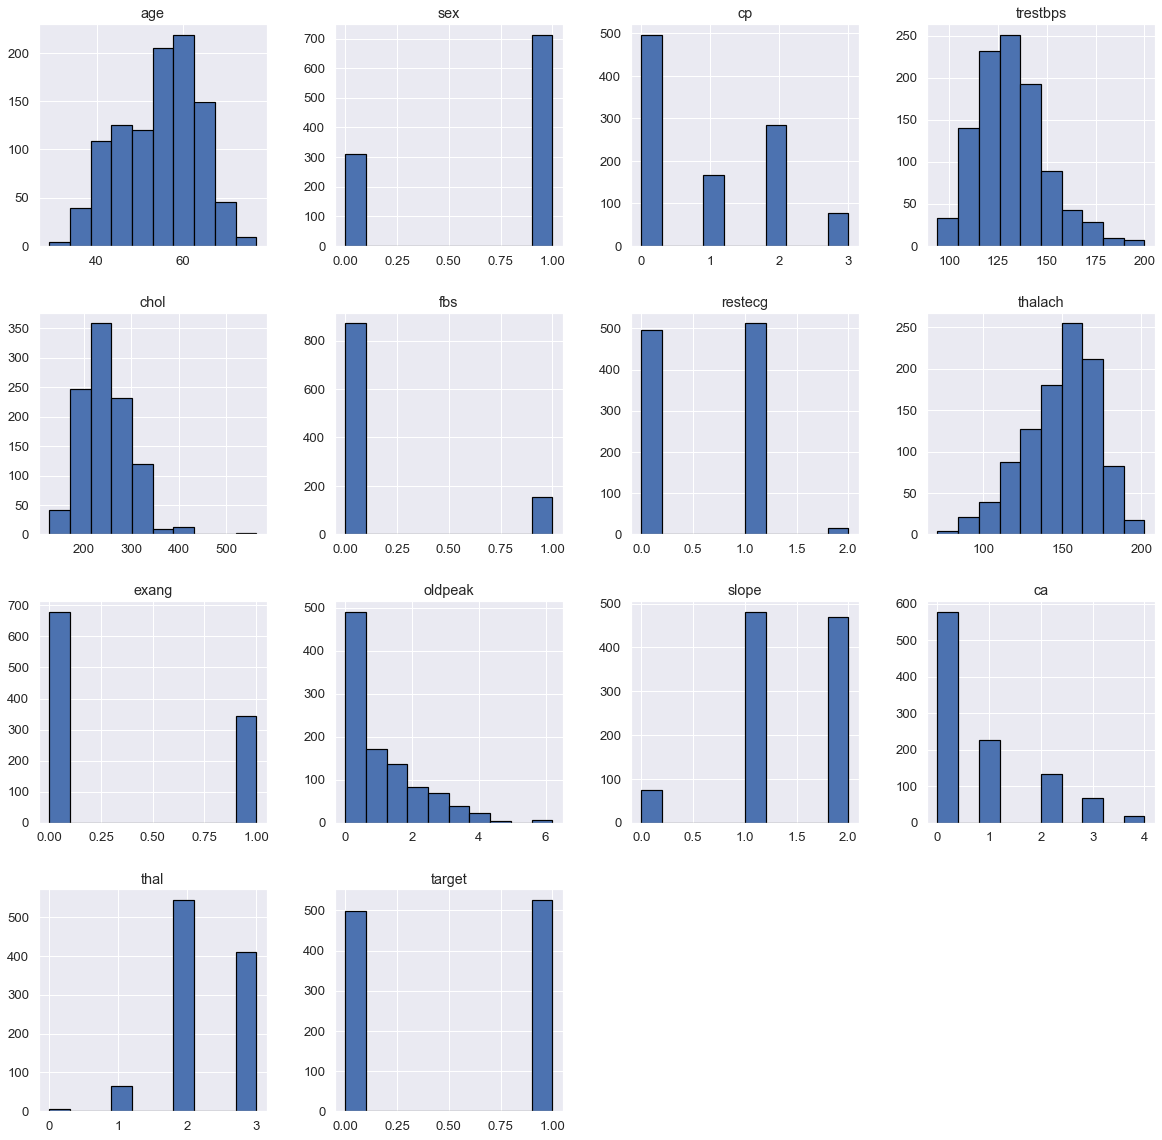

In [7]:
sns.set(font_scale = 1.2)
data.hist(figsize=(20,20), edgecolor="black", linewidth=1.2)

The above output shows the histogram for each attribute in the dataset. From this, we can observe that perhaps `oldpeak` may have exponential distribution while `age` and `thalach`, `trestbps` have Gaussian distribution.

2. **density plot**:
Another quick and easy technique for getting each attributes distribution is Density plots. It is also like histogram but having a smooth curve drawn through the top of each bin.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

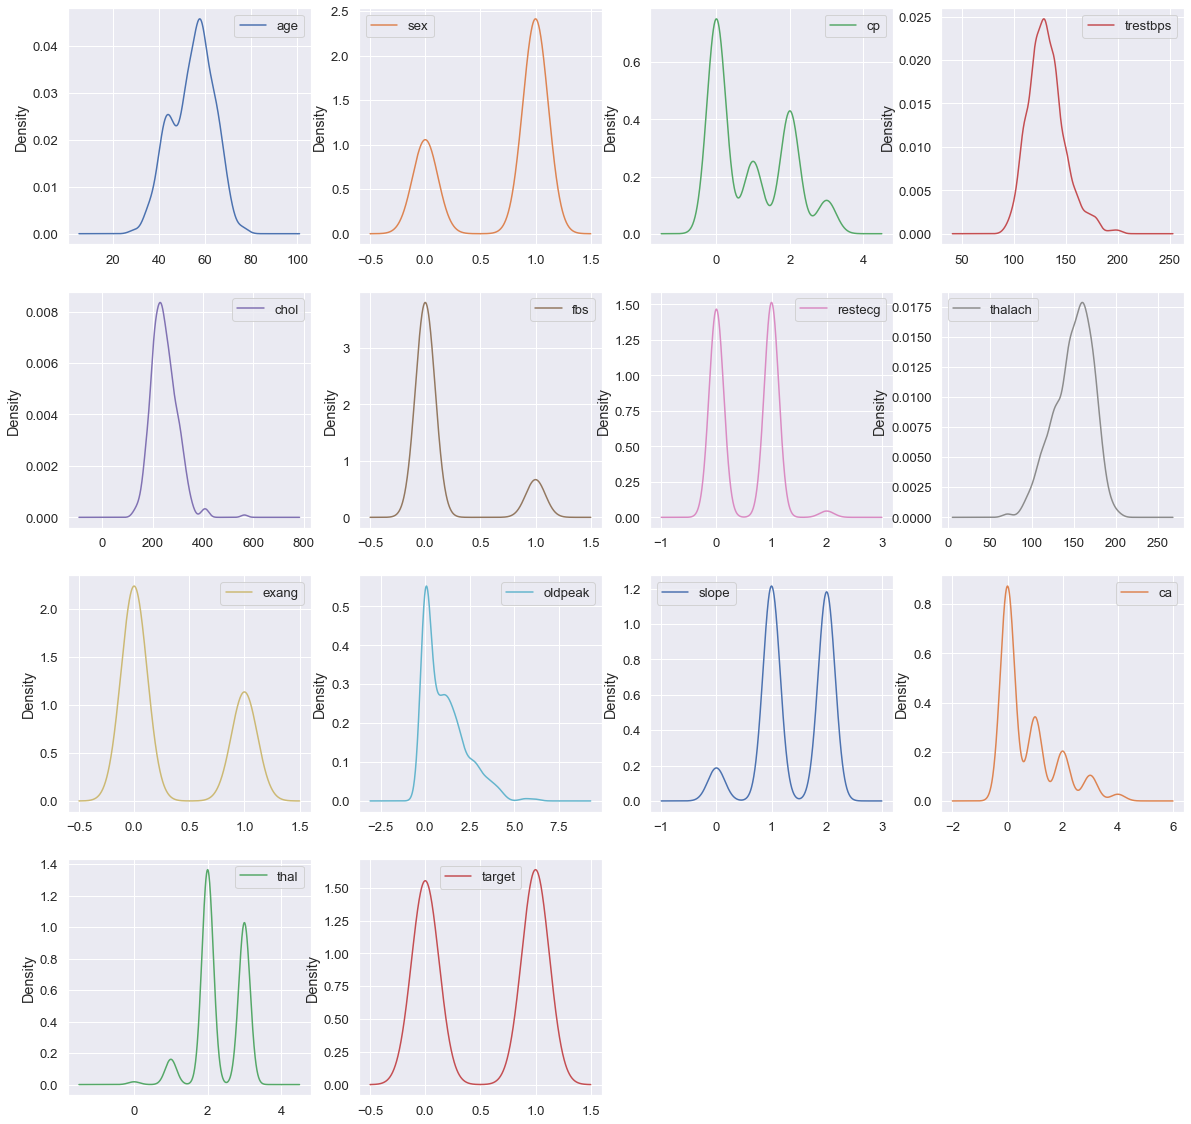

In [8]:
sns.set(font_scale = 1.2)
data.plot(kind="density", subplots=True, layout=(4,4), sharex=False, figsize=(20,20))

3.  **Correlation Matrix Plot**:
We plot the correlation matrix to show which variable is having a high or low correlation in respect to another variable.

In [9]:
correlations = data.corr()
correlations.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

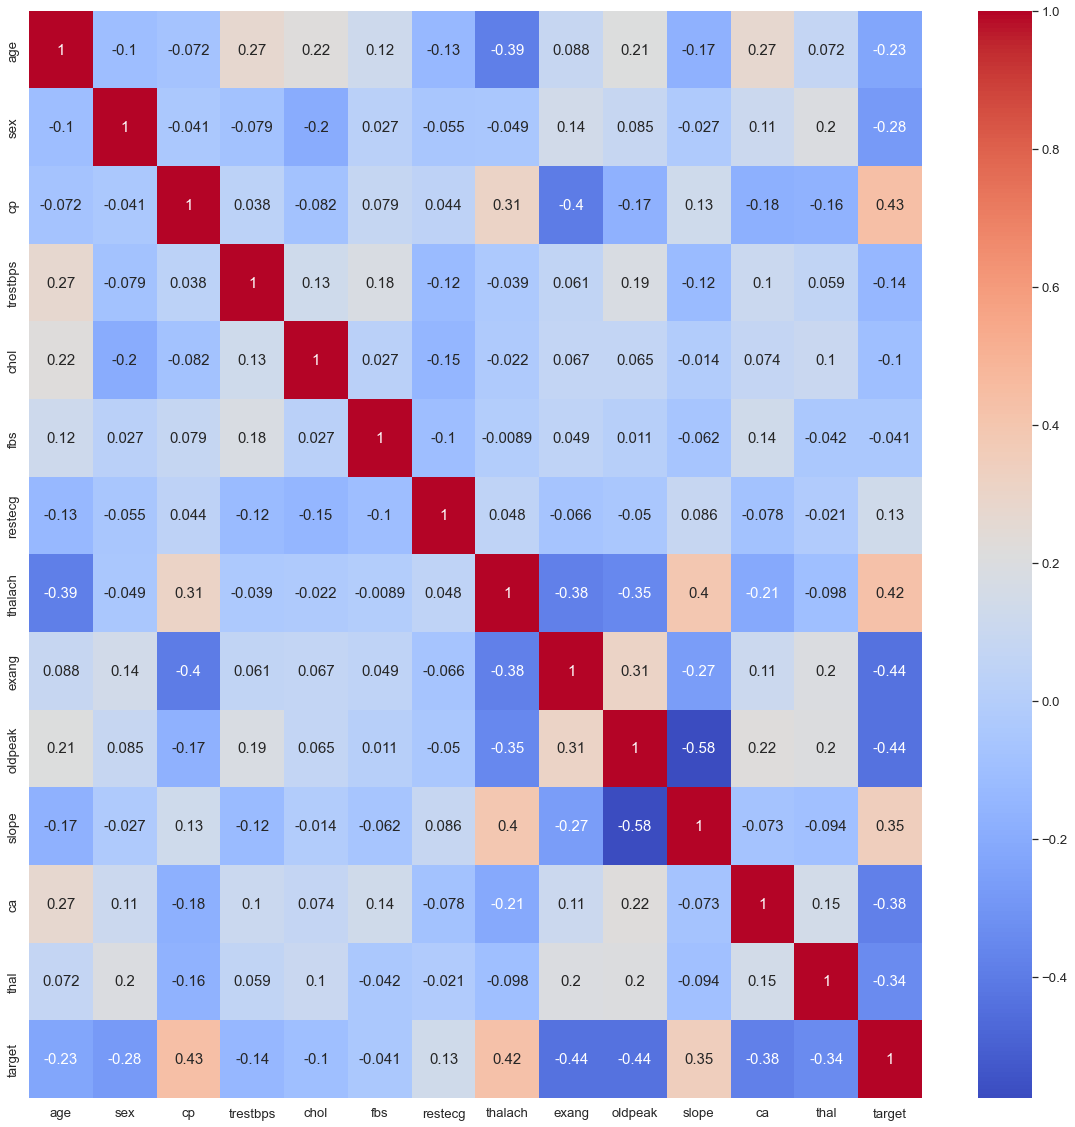

In [10]:

# plt.matshow(correlations)
# plt.yticks(np.arange(data.shape[1]), data.columns)
# plt.xticks(np.arange(data.shape[1]), data.columns)
# plt.colorbar()

corr_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", annot_kws={"size":15})

In the code below we can verify the distribution of the target classes. It is a good practice to verify that, the more balance are
the classes, the better for the model

Text(0.5, 1.0, 'Distribution of Target Class')

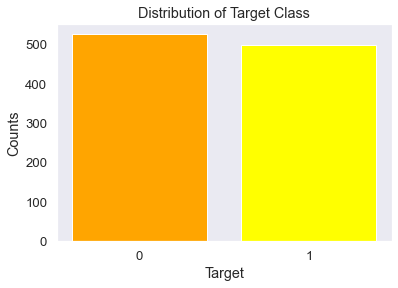

In [69]:
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['orange','yellow'])
plt.xticks([0, 1])
plt.xlabel("Target")
plt.ylabel("Counts")
plt.grid(False)
plt.title("Distribution of Target Class")

we can observe that the data are almost the same size which is good

#### Data Processing
In this stage we are going to perform a series of experiments with the data. 
1. We will keep all the columns, train our model and observe the results.
2. Keep some colums and do the same and observe the result as well

In [78]:
# kepping all the data
# drop NA values
data = data.dropna()
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.3,-0.4,-0.7,0.8,-0.1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.2,0.5,-0.8,0.3,1.7,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.7,0.8,-1.4,-1.0,1.3,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.7,0.9,-0.8,0.5,-0.9,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.8,0.4,0.9,-1.9,0.7,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
# Data Scaling
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# data_rescaled = data_scaler.fit_transform(data)
# data_rescaled[0:10]
# data_rescaled = pd.DataFrame(data_rescaled)

# train model 
# data_shuffle = shuffle(data)
# data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
# data.head()
scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
# data.head()

y = data['target']
# y.head()
X = data.drop(['target'], axis = 1)
# X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state = 0)

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [10]:
# save model and data

# create saving path
if not os.path.exists('data'):
    os.makedirs('data')

#saving train data
train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis= 1).dropna()
train_df.to_csv(os.path.join('data', 'train.csv'), header=True, index=False)
print('path created: ' + str('data') + '/' + str('train.csv')) 

# saving test data
test_df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis= 1).dropna()
train_df.to_csv(os.path.join('data', 'test.csv'), header=True, index=False)
print('path created: ' + str('data') + '/' + str('test.csv')) 

path created: data/train.csv
path created: data/test.csv
